# 02 - Exploratory Data Analysis

In [157]:
import pandas as pd
import numpy as np
import collections
import seaborn as sns
import matplotlib.pyplot as plt
from re import sub
from decimal import Decimal
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from math import sqrt
import matplotlib.style as style 
%matplotlib inline

## I. Data Extraction

### 1. Dataset: Player Advanced Statistics

In [2]:
advanced_stat=pd.read_csv('advanced_stat.csv', index_col=0)

In [3]:
advanced_stat.head()

,Name,Age,Tm,WS,G,MP,PER,3PAr,FTr,ORB%,...,USG%,ORtg,DRtg,OWS,DWS,WS/48,OBPM,DBPM,BPM,VORP
0,James Harden,29,HOU,15.2,78,2867,30.6,0.539,0.449,2.5,...,40.5,118,108,11.4,3.8,0.254,10.5,1.1,11.7,9.9
1,Giannis Antetokounmpo,24,MIL,14.4,72,2358,30.9,0.163,0.550,7.3,...,32.3,121,99,8.9,5.5,0.292,5.7,5.0,10.8,7.6
2,Rudy Gobert,26,UTA,14.4,81,2577,24.6,0.000,0.733,13.2,...,17.8,133,100,8.7,5.7,0.268,2.0,5.1,7.0,5.9
3,Damian Lillard,28,POR,12.1,80,2838,23.7,0.419,0.335,2.6,...,29.3,121,112,9.7,2.4,0.205,6.6,-1.1,5.5,5.4
4,Paul George,28,OKC,11.9,77,2841,23.3,0.469,0.335,3.7,...,29.5,116,105,7.0,4.9,0.201,4.7,0.7,5.5,5.3


In [4]:
advanced_stat.shape

(526, 26)

In [16]:
advanced_stat.columns

Index(['Name', 'Age', 'Tm', 'WS', 'G', 'MP', 'PER', '3PAr', 'FTr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'ORtg', 'DRtg',
       'OWS', 'DWS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')

In [19]:
advanced_stat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526 entries, 0 to 550
Data columns (total 26 columns):
Name     526 non-null object
Age      526 non-null int64
Tm       526 non-null object
WS       526 non-null float64
G        526 non-null int64
MP       526 non-null int64
PER      526 non-null float64
3PAr     526 non-null float64
FTr      526 non-null float64
ORB%     526 non-null float64
DRB%     526 non-null float64
TRB%     526 non-null float64
AST%     526 non-null float64
STL%     526 non-null float64
BLK%     526 non-null float64
TOV%     526 non-null float64
USG%     526 non-null float64
ORtg     526 non-null int64
DRtg     526 non-null int64
OWS      526 non-null float64
DWS      526 non-null float64
WS/48    526 non-null float64
OBPM     526 non-null float64
DBPM     526 non-null float64
BPM      526 non-null float64
VORP     526 non-null float64
dtypes: float64(19), int64(5), object(2)
memory usage: 111.0+ KB


### 2. Dataset: Player Statistics Per Game

In [5]:
player_stat=pd.read_csv('player_stat.csv',index_col=0)
player_stat.head()

,Name,Pos,Age,GS,eFG%,PF,PTS
310,Justin Holiday,SG,29,77,0.490,2.0,10.5
480,Patty Mills,PG,30,1,0.545,1.6,9.9
330,Joe Ingles,PF,31,82,0.565,2.2,12.1
54,DeAndre' Bembry,SG,24,15,0.487,2.3,8.4
674,P.J. Tucker,PF,33,82,0.535,3.1,7.3


In [6]:
player_stat.shape

(530, 7)

In [7]:
player_data=pd.merge(player_stat,advanced_stat, on=['Name','Age'],how='left')
#let's check if we have any missing values
player_data.isnull().sum()

Name     0
Pos      0
Age      0
GS       0
eFG%     0
PF       0
PTS      0
Tm       4
WS       4
G        4
MP       4
PER      4
3PAr     4
FTr      4
ORB%     4
DRB%     4
TRB%     4
AST%     4
STL%     4
BLK%     4
TOV%     4
USG%     4
ORtg     4
DRtg     4
OWS      4
DWS      4
WS/48    4
OBPM     4
DBPM     4
BPM      4
VORP     4
dtype: int64

In [8]:
#let's see where the NA values are located
player_data[player_data['eFG%'].isnull()]

,Name,Pos,Age,GS,eFG%,PF,PTS,Tm,WS,G,...,USG%,ORtg,DRtg,OWS,DWS,WS/48,OBPM,DBPM,BPM,VORP


In [9]:
#It seems like these four people didn't play in the 2018-2019 season, so we can drop their statistics
player_data=player_data.fillna(0)

### 3. Dataset: Players Salaries

In [10]:
salary=pd.read_csv('salary.csv',index_col=0)
salary.head()

,Name,Team,Salary
1,Stephen Curry,Golden State Warriors,37457154
2,Chris Paul,Houston Rockets,35654150
3,LeBron James,Los Angeles Lakers,35654150
4,Russell Westbrook,Oklahoma City Thunder,35654150
5,Blake Griffin,Detroit Pistons,32088932


In [11]:
salary.shape

(503, 3)

In [84]:
player_salary=pd.merge(salary,player_data,on='Name',how='outer')
player_salary.shape

(622, 33)

In [13]:
player_salary.isnull().sum()
#93 of the players have no salary values maybe it's not shown in public
#we can either drop them or find average numbers to replace them

Name        0
Team      119
Salary    119
Pos        92
Age        92
GS         92
eFG%       92
PF         92
PTS        92
Tm         92
WS         92
G          92
MP         92
PER        92
3PAr       92
FTr        92
ORB%       92
DRB%       92
TRB%       92
AST%       92
STL%       92
BLK%       92
TOV%       92
USG%       92
ORtg       92
DRtg       92
OWS        92
DWS        92
WS/48      92
OBPM       92
DBPM       92
BPM        92
VORP       92
dtype: int64

In [14]:
player_salary.dropna(inplace=True)

### 4. Dataset: Team Statistics

In [15]:
team_rate=pd.read_csv('team_rate.csv',index_col=0)
team_rate.head()

,Team,W/L%,MOV/A,NRtg/A
0,Milwaukee Bucks,0.732,8.05,7.66
1,Golden State Warriors,0.695,6.42,6.37
2,Toronto Raptors,0.707,5.49,5.38
3,Utah Jazz,0.610,5.29,5.28
4,Houston Rockets,0.646,4.97,5.03


## II. Explortory Data Analysis

### Objectives:
1. Which team has the highest total salary?
2. Do the players'salaries affect teams' W/L%?
3. Which position get the higest salary?
4. On average, what is the age group that has the highest salaries?
5. What are some factors determined salary?

In [21]:
team_rate_salary=pd.merge(team_rate,salary)
team_rate_salary=team_rate_salary.groupby('Team')['Salary'].sum().to_frame().sort_values('Salary', ascending=False).reset_index()
team_rate_salary.head()

,Team,Salary
0,Memphis Grizzlies,167050134
1,Washington Wizards,160582684
2,Philadelphia 76ers,153357133
3,Oklahoma City Thunder,151109192
4,Golden State Warriors,144354753


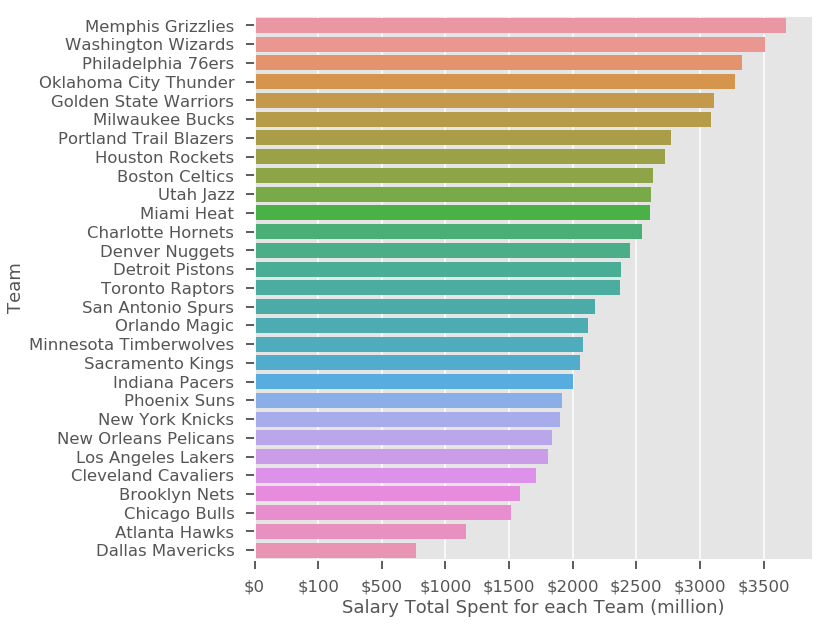

In [22]:
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')
sns.set_context('talk') 
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xticklabels(['$0', '$100', '$500', '$1000', '$1500','$2000','$2500','$3000','$3500'])
sns.barplot(x=team_rate_salary.Salary, y=team_rate_salary.Team)
ax.set_xlabel('Salary Total Spent for each Team (million)');
#The total salary for MEM team is over 3.5 billion

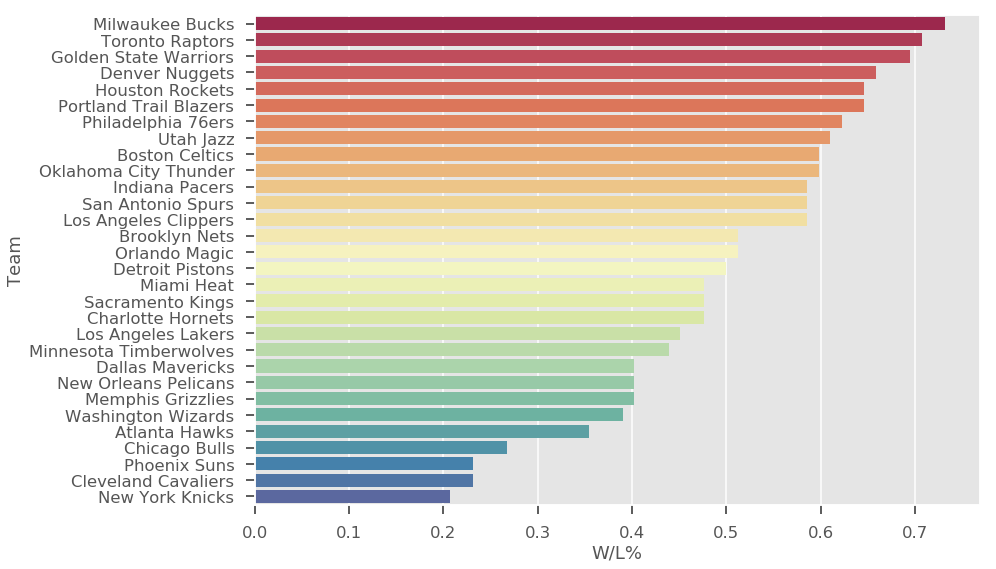

In [23]:
sns.set_context('talk') 
fig, ax = plt.subplots(figsize=(13,9))
team_rate=team_rate.sort_values('W/L%',ascending=False)
sns.barplot(x=team_rate['W/L%'], y=team_rate['Team'],palette=("Spectral"));

In [19]:
player_stat.shape

(530, 7)

In [20]:
salary.shape

(503, 3)

In [171]:
player_stat_salary=pd.merge(player_data,salary,on='Name',how='left')
player_stat_salary.isnull().sum()

Name        0
Pos         0
Age         0
GS          0
eFG%        0
PF          0
PTS         0
Tm          0
WS          0
G           0
MP          0
PER         0
3PAr        0
FTr         0
ORB%        0
DRB%        0
TRB%        0
AST%        0
STL%        0
BLK%        0
TOV%        0
USG%        0
ORtg        0
DRtg        0
OWS         0
DWS         0
WS/48       0
OBPM        0
DBPM        0
BPM         0
VORP        0
Team      119
Salary    119
dtype: int64

In [82]:
player_stat_salary.columns

Index(['Name', 'Pos', 'Age', 'GS', 'eFG%', 'PF', 'PTS', 'Tm', 'WS', 'G', 'MP',
       'PER', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%',
       'TOV%', 'USG%', 'ORtg', 'DRtg', 'OWS', 'DWS', 'WS/48', 'OBPM', 'DBPM',
       'BPM', 'VORP', 'Team', 'Salary'],
      dtype='object')

In [172]:
#there are 119 players have missing value in their salaries, we can drop them
player_stat_salary.dropna(inplace=True)

In [173]:
player_stat_salary.isnull().sum()

Name      0
Pos       0
Age       0
GS        0
eFG%      0
PF        0
PTS       0
Tm        0
WS        0
G         0
MP        0
PER       0
3PAr      0
FTr       0
ORB%      0
DRB%      0
TRB%      0
AST%      0
STL%      0
BLK%      0
TOV%      0
USG%      0
ORtg      0
DRtg      0
OWS       0
DWS       0
WS/48     0
OBPM      0
DBPM      0
BPM       0
VORP      0
Team      0
Salary    0
dtype: int64

In [87]:
player_stat_salary.shape

(411, 33)

In [80]:
player_stat_salary.groupby(['Pos'])['Salary'].sum().to_frame().sort_values('Salary',ascending=False).reset_index()

,Pos,Salary
0,PG,644588244.0
1,SG,603283426.0
2,C,602029483.0
3,PF,544617566.0
4,SF,433733322.0
5,PF-SF,36907820.0
6,SF-SG,20958525.0
7,SG-PF,7560000.0
8,SG-SF,6000000.0
9,PF-C,5450000.0


PG: Point guard
SG: Shooting guard
C: Center
PF: Power forward
SF: Small forward




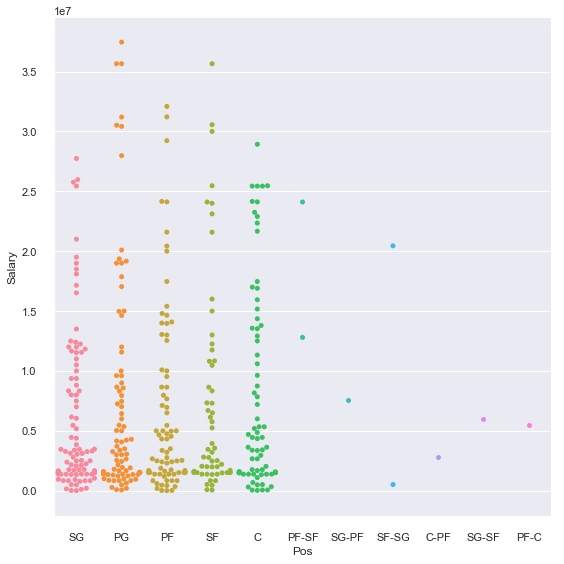

In [68]:
sns.catplot(x="Pos", y="Salary",kind="swarm", data=player_stat_salary, height=8, aspect=1)

In [26]:
player_stat_salary.groupby('Age')['Salary'].mean().to_frame().sort_values('Salary',ascending=False).reset_index()

,Age,Salary
0,30,1.359008e+07
1,28,1.134353e+07
2,29,1.130398e+07
3,33,1.130277e+07
4,32,1.029464e+07
5,34,9.682744e+06
6,27,8.259709e+06
7,26,8.202131e+06
8,31,8.041715e+06
9,25,6.462831e+06


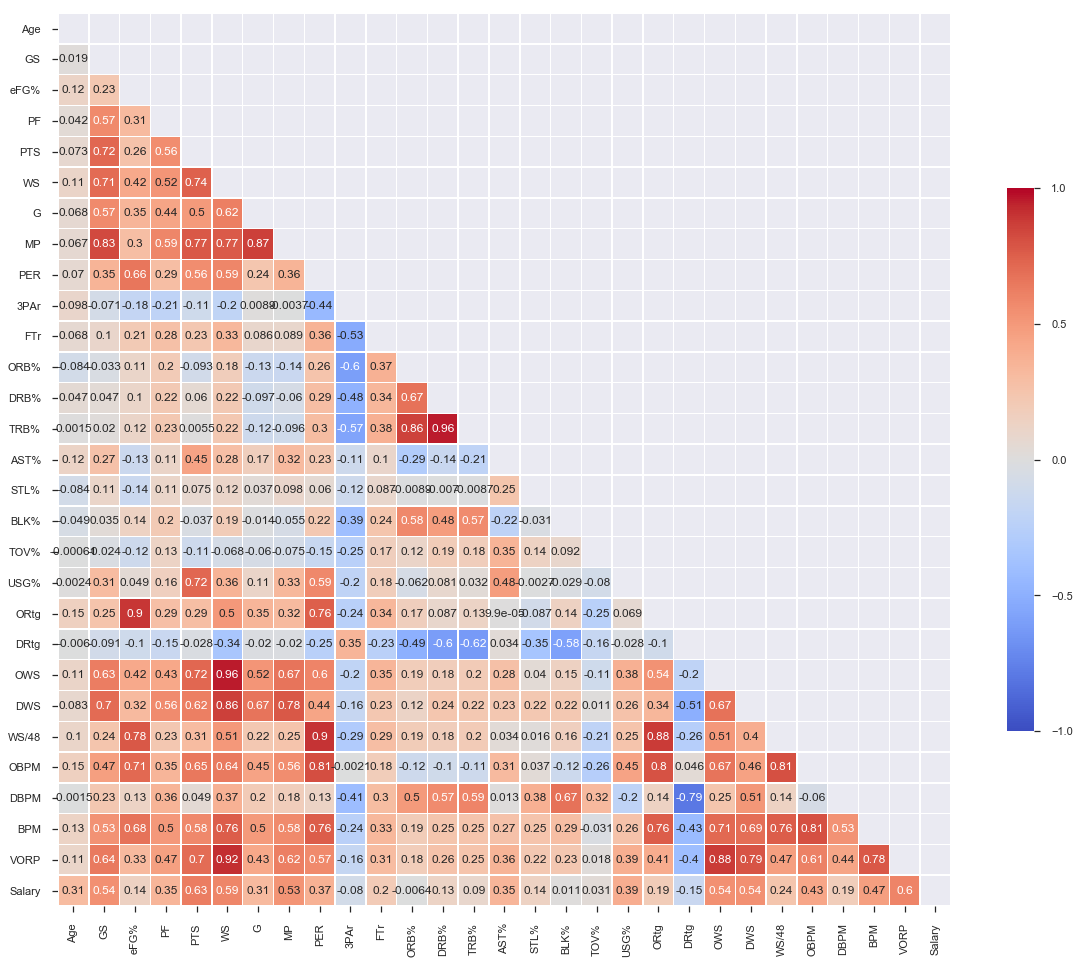

In [132]:
f, ax = plt.subplots(figsize=(20, 25))

mask = np.zeros_like(player_stat_salary.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

sns.heatmap(player_stat_salary.corr(),square = True,
                      mask=mask,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})

I wanted to take a look at how my categories were interacting with each other so I created this Heatmap. The dark red squares indicate a strong positive correlation while the dark blue squares indicate a strong negative correlation. As you can see there are many dark red squares in my Heatmap indicating a lot of multicollinearity in my data. We can try to drop some columns. 

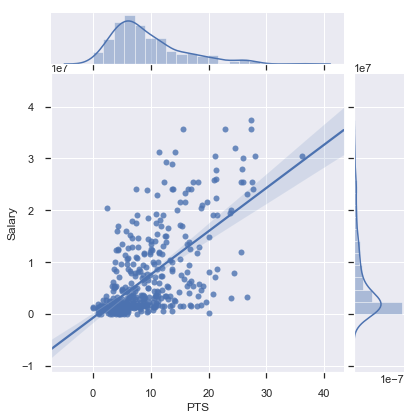

In [143]:
sns.jointplot('PTS','Salary', kind="regplot", data=player_stat_salary);

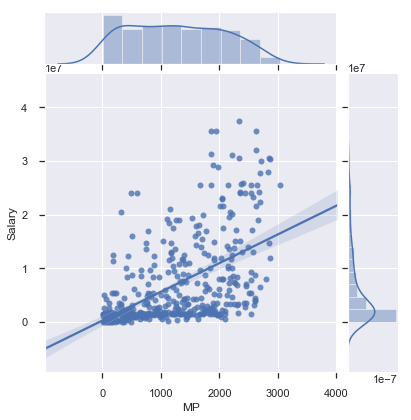

In [144]:
sns.jointplot('MP','Salary', kind="regplot", data=player_stat_salary);

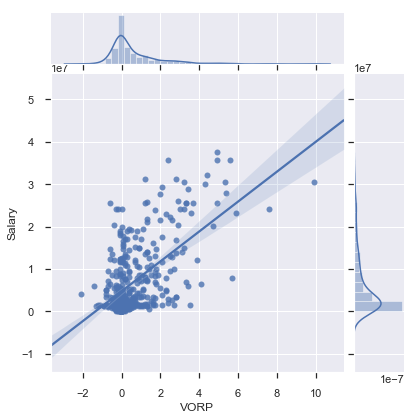

In [145]:
sns.jointplot('VORP','Salary', kind="regplot", data=player_stat_salary);

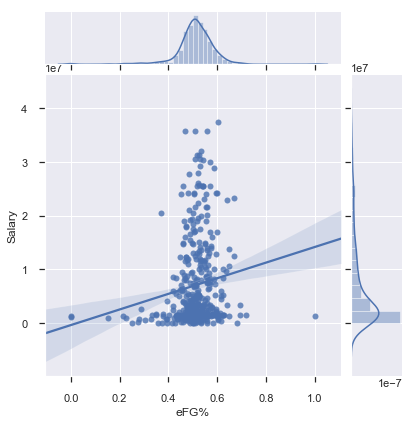

In [187]:
#eFG
sns.jointplot('eFG%','Salary', kind="regplot", data=player_stat_salary);
#this shows that we could use box-cox to transform dependent variable (salary)
#to see if we can improve the model performance

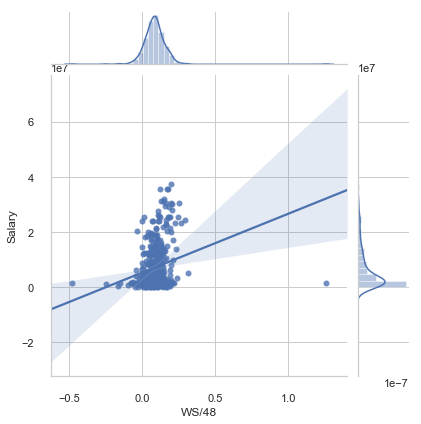

In [229]:
sns.jointplot('WS/48','Salary', kind="regplot", data=player_stat_salary);

### Summary:
1. Memphis Grizzlies team has the highest total salary, and the highest W/L %. 
2. Spending large amount on players salaries is not guaranteed to receive high W/L %.
3. Point Guard position get the higest salary, but most positions earn around $0-5 million range.
4. On average, late 20 and early 30 is the age group that has the highest salaries.
5. Based on the heatmap and the joint plot, salary is correlated with players' points, value over Replacement Player (VORP). 

## III. Initial Modeling with StatsModels

In [174]:
player_stat_salary.drop(['MP','OWS','DWS','OBPM','DBPM','ORB%','DRB%'], axis=1, inplace=True)

In [147]:
player_stat_salary.columns

Index(['Name', 'Pos', 'Age', 'GS', 'eFG%', 'PF', 'PTS', 'Tm', 'WS', 'G', 'PER',
       '3PAr', 'FTr', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'ORtg',
       'DRtg', 'WS/48', 'BPM', 'VORP', 'Team', 'Salary'],
      dtype='object')

In [175]:
#only extract the numeric columns
player_salary_num=player_stat_salary._get_numeric_data()

In [176]:
#remove the punctuation in the column names 
player_salary_num.columns=player_salary_num.columns.str.replace('[^\w\s]','')

In [177]:
#rename column name
player_salary_num=player_salary_num.rename({'3PAr': 'PAR','FTr':'FTR'}, axis=1) 
player_salary_num.columns

Index(['Age', 'GS', 'eFG', 'PF', 'PTS', 'WS', 'G', 'PER', 'PAR', 'FTR', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'USG', 'ORtg', 'DRtg', 'WS48', 'BPM',
       'VORP', 'Salary'],
      dtype='object')

In [179]:
X, y = player_salary_num.drop(columns = ['Salary']), player_salary_num['Salary']

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)
X_train = sm.add_constant(X_train, has_constant='add') #something already has a variance of 0

In [181]:
model = sm.OLS(y_train, X_train)

fit1 = model.fit() 
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     19.45
Date:                Sat, 14 Mar 2020   Prob (F-statistic):           1.63e-44
Time:                        18:26:42   Log-Likelihood:                -5549.2
No. Observations:                 328   AIC:                         1.114e+04
Df Residuals:                     306   BIC:                         1.123e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.411e+06    3.1e+07     -0.174      0.862   -6.65e+07    5.57e+07
Age         4.985e+05   7.56e+04      6.591      0.000     3.5e+05    6.47e+05
GS          4.254e+04   2.03e+04      2.097      0.037    2630.039    8.24e+04
eFG         6.966e+05   1.49e+07      0.047      0.963   -2.87e+07    3.01e+07
PF         -1.159e+06   7.92e+05     -1.464      0.144   -2.72e+06    3.99e+05
PTS          5.88e+05   2.24e+05      2.625      0.009    1.47e+05    1.03e+06
WS           5.09e+05    5.7e+05      0.894      0.372   -6.12e+05    1.63e+06
G          -3.799e+04   2.63e+04     -1.445      0.149   -8.97e+04    1.37e+04
PER        -2.295e+05   7.09e+05     -0.324      0.746   -1.62e+06    1.16e+06
PAR        -7.895e+05   2.72e+06     -0.291      0.771   -6.13e+06    4.56e+06
FTR         2.625e+06   3.58e+06      0.733      0.464   -4.42e+06    9.67e+06
TRB         1.709e+05   2.21e+05      0.773      0.440   -2.64e+05    6.06e+05
AST         2.629e+04   9.59e+04      0.274      0.784   -1.62e+05    2.15e+05
STL         1.964e+05   1.07e+06      0.184      0.855   -1.91e+06     2.3e+06
BLK        -2.215e+05   4.56e+05     -0.486      0.627   -1.12e+06    6.76e+05
TOV         1.037e+05   1.38e+05      0.751      0.453   -1.68e+05    3.75e+05
USG        -9.784e+04   2.88e+05     -0.339      0.735   -6.65e+05     4.7e+05
ORtg       -2.433e+05   1.47e+05     -1.656      0.099   -5.32e+05    4.58e+04
DRtg        1.958e+05   2.75e+05      0.711      0.477   -3.46e+05    7.37e+05
WS48        2.653e+07   3.73e+07      0.710      0.478    -4.7e+07       1e+08
BPM         6.527e+05   4.29e+05      1.523      0.129   -1.91e+05     1.5e+06
VORP        1.182e+05   9.95e+05      0.119      0.906   -1.84e+06    2.08e+06
==============================================================================
Omnibus:                       20.949   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.386
Skew:                           0.501   Prob(JB):                     1.13e-06
Kurtosis:                       3.999   Cond. No.                     2.61e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This initial model has low conditional number, which means the multi-collinearity is relatively low. As a result, although many of the P-values are high, we can still leave it for now and improve it later. There are many ways we can try to improve this model. For example, we could standardize the data and remove features to help with multi-collinearity. Besides, we could also use log-transformation on our dependent varable since it's non-negative.

In [210]:
#let's drop some columns to see if it make any improvement
player_salary_num_cp=player_salary_num.copy()

In [211]:
player_salary_num_cp=player_salary_num_cp.drop(['eFG','AST','PAR','USG','BPM','WS'],axis=1)

In [212]:
X2, y2 = player_salary_num_cp.drop(columns = ['Salary']), player_salary_num_cp['Salary']

In [213]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size= 0.2, random_state = 42)
X2_train = sm.add_constant(X2_train, has_constant='add') #something already has a variance of 0

In [214]:
model2 = sm.OLS(y2_train, X2_train)

fit2 = model2.fit() 
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     27.11
Date:                Sat, 14 Mar 2020   Prob (F-statistic):           8.50e-48
Time:                        19:05:33   Log-Likelihood:                -5551.4
No. Observations:                 328   AIC:                         1.113e+04
Df Residuals:                     312   BIC:                         1.120e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.194e+07   1.67e+07     -1.316      0.189   -5.47e+07    1.09e+07
Age         5.023e+05   7.37e+04      6.811      0.000    3.57e+05    6.47e+05
GS          4.586e+04    1.9e+04      2.409      0.017    8401.150    8.33e+04
PF         -1.403e+06   7.12e+05     -1.972      0.049    -2.8e+06   -3376.180
PTS         7.639e+05   1.76e+05      4.337      0.000    4.17e+05    1.11e+06
G          -1.656e+04   1.91e+04     -0.867      0.386   -5.41e+04     2.1e+04
PER        -4.974e+05   2.81e+05     -1.773      0.077   -1.05e+06    5.46e+04
FTR         1.218e+06    2.9e+06      0.420      0.675   -4.49e+06    6.93e+06
TRB         2.615e+05   1.24e+05      2.113      0.035     1.8e+04    5.05e+05
STL         1.118e+06   6.53e+05      1.711      0.088   -1.67e+05     2.4e+06
BLK        -1.933e+04   3.02e+05     -0.064      0.949   -6.14e+05    5.76e+05
TOV         1.961e+05   8.79e+04      2.230      0.026    2.31e+04    3.69e+05
ORtg       -1.102e+05   6.48e+04     -1.702      0.090   -2.38e+05    1.72e+04
DRtg        1.686e+05   1.56e+05      1.078      0.282   -1.39e+05    4.76e+05
WS48        4.086e+07   1.97e+07      2.079      0.038    2.19e+06    7.95e+07
VORP        1.138e+06   4.45e+05      2.560      0.011    2.63e+05    2.01e+06
==============================================================================
Omnibus:                       21.346   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.303
Skew:                           0.503   Prob(JB):                     7.15e-07
Kurtosis:                       4.029   Cond. No.                     1.22e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [215]:
#pickle the data so far
player_salary_num_cp.to_pickle('./player_salary.pkl')

In [226]:
player_salary_num_cp.columns

Index(['Age', 'GS', 'PF', 'PTS', 'G', 'PER', 'FTR', 'TRB', 'STL', 'BLK', 'TOV',
       'ORtg', 'DRtg', 'WS48', 'VORP', 'Salary'],
      dtype='object')

In [223]:
col_dict = {"Age": "Age",
            "GS": "Games Started",
            "PF": "Personal Fouls", 
            "PTS": "Points",
            "G": "Games",
            "PER": "Player Efficiency Rating",
            "FTR": "Free Throw Rate",
            "TRB": "Total Rebounds%",
            "STL": "Average steals per game",
            "BLK": "BLK",
            "TRB": "Total Rebounds%",
            "TOV": "Turnovers",
            "ORtg": "Offensive Rating",
            "DRtg": "Average steals per game",
            "BLK": "Blocks",
            "WS48": "Win Shares Per 48 Minutes",
            "VORP": "Value Over Replacement Player",#a box score estimate of the points 
            #per 100 TEAM possessions that a player contributed above a replacement-level (-2.0) player
            "Salary": "Salary" 
           }

In [218]:
def transform_visualizer(df, x_var, y_var, x_scale, y_scale, col_dict, savefig = False):
    """
        Function that produces a plot, given the dataframe
        
        :param df: pandas dataframe
        :param x_var: independent variable to plot
        :param y_var: dependent variable to plot
        :param x_scale: type of x axis, "log", "linear", "symlog", "logit"
        :param y_scale: type of y axis, "log", "linear", "symlog", "logit"
    """
    
    plt.figure(figsize= (5,5))
    sns.set_style("whitegrid")
    ax = sns.scatterplot(df[x_var], df[y_var], alpha = 0.75)
    ax.set(xscale=x_scale, yscale=y_scale);
    plt.xlabel(xlabel=col_dict[x_var], y=1.25, fontsize = 12, weight= 'bold')
    plt.ylabel(ylabel=col_dict[y_var], x=1.05, fontsize = 12, weight = 'bold')
    plt.xlim([1, df[x_var].max()])
    plt.ylim([1, df[y_var].max()])
    plt.title(label = col_dict[y_var] + ' vs ' + col_dict[x_var], 
              fontsize = 15, y = 1.025, weight='bold');
    
#     if savefig:
#         plt.savefig("./img/" + col_dict[y_var] + ' vs ' + col_dict[x_var] + ".png")

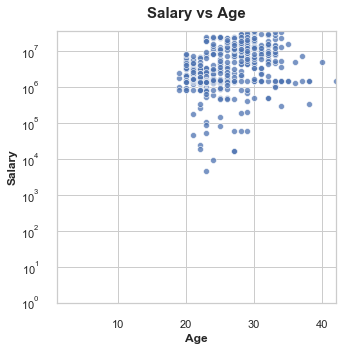

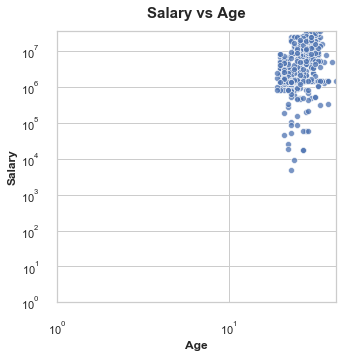

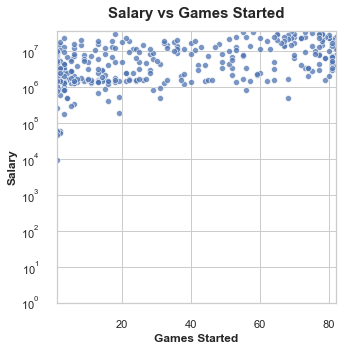

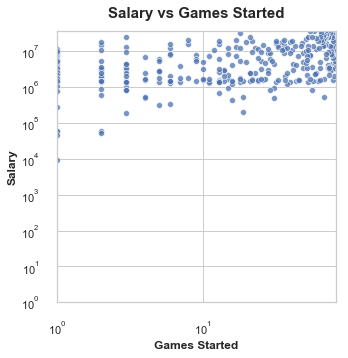

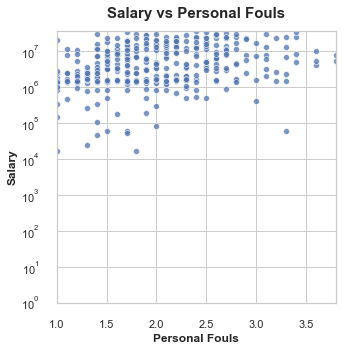

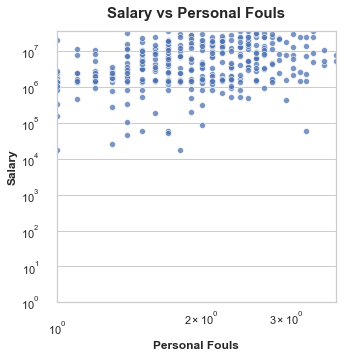

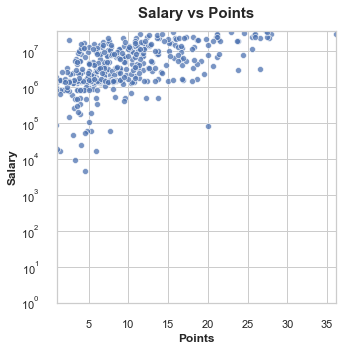

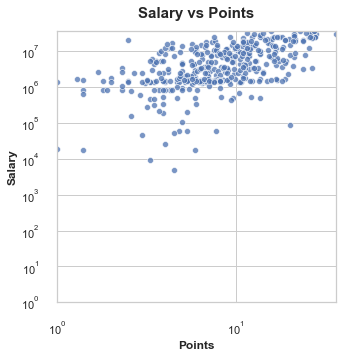

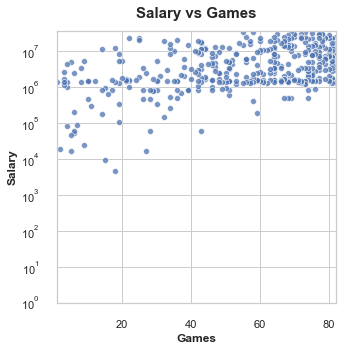

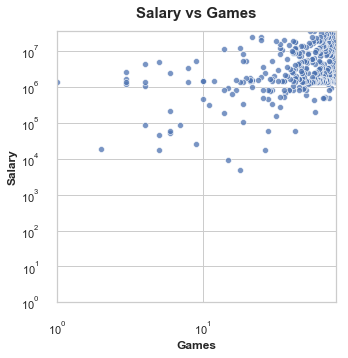

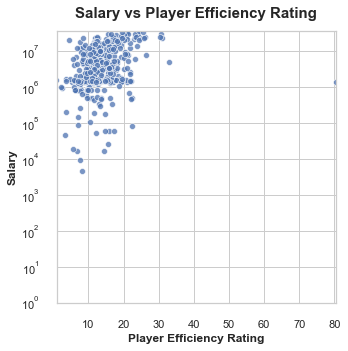

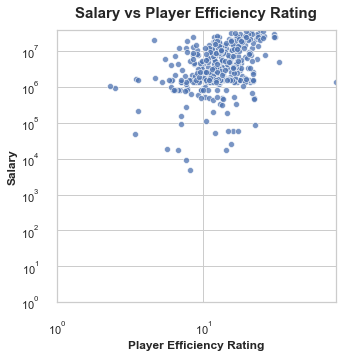

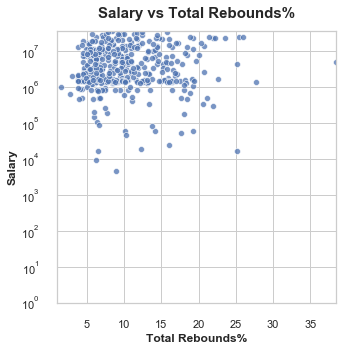

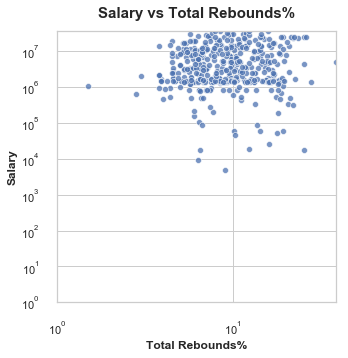

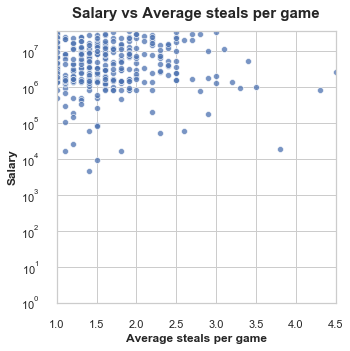

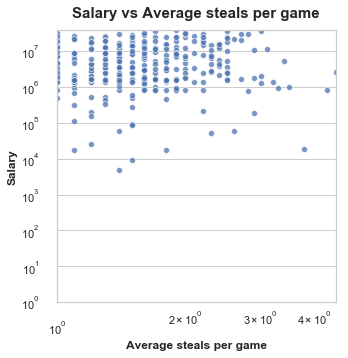

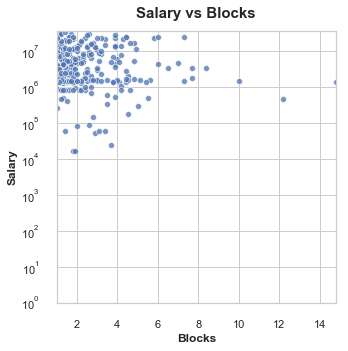

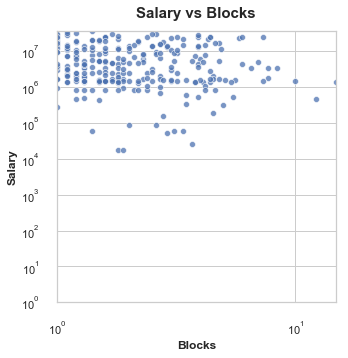

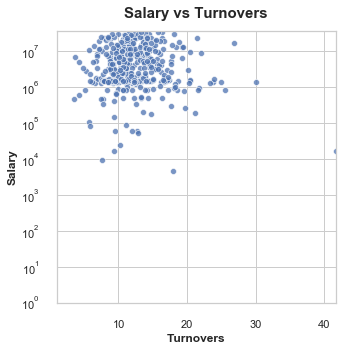

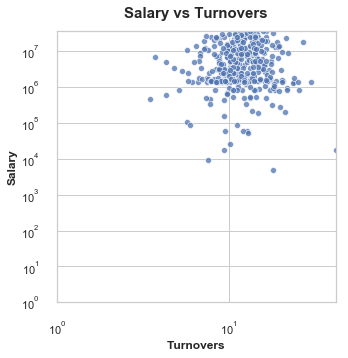

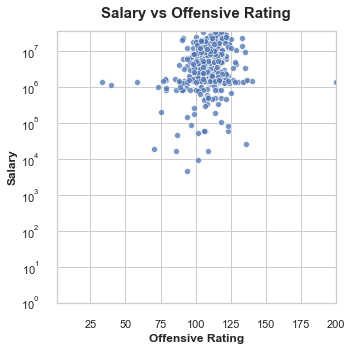

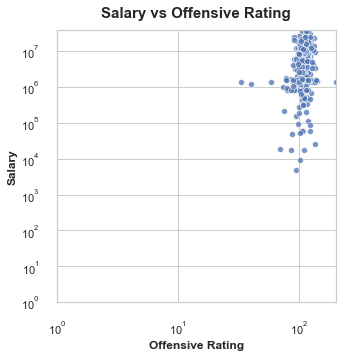

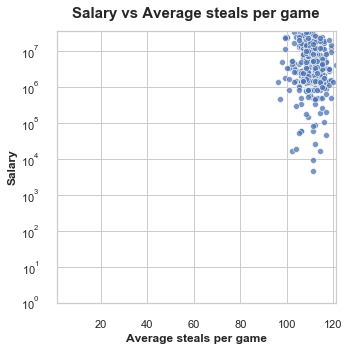

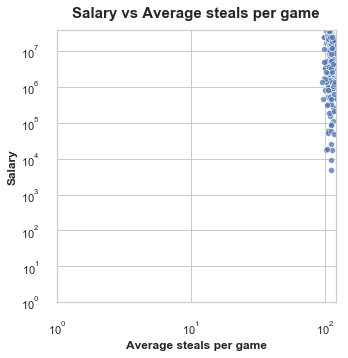

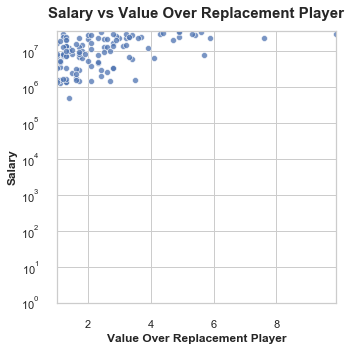

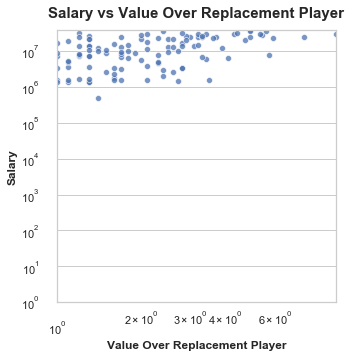

In [231]:

for col in player_salary_num_cp.columns:
    if col != 'Salary':
        if col != 'FTR' and col != 'WS48':
            transform_visualizer(player_salary_num_cp, col, 'Salary', 'linear', 'log', col_dict)
            transform_visualizer(player_salary_num_cp, col, 'Salary', 'log', 'log', col_dict)